In [35]:
# https://www.kaggle.com/alexisbcook/titanic-tutorial
# https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook
import pandas as pd
import libs.simple_processing as pds
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import re

In [36]:
results = {}
# Read the data
X = pd.read_csv('input/train.csv')
X_test_full = pd.read_csv('input/test.csv')

X_test_full.info()
TEST = X_test_full.copy()
PassengerIds = X_test_full.PassengerId.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
def get_surname(name):
    reg = re.compile('([A-Za-z]+),')
    return reg.findall(name)[0]


def process_data(df):
    # df['Surname'] = df.apply(lambda row: get_surname(row['Name']), axis='columns')
    df.drop(['Name', 'Cabin', 'Ticket'], axis='columns', inplace=True)
    df.dropna(axis='index', subset=df.columns, inplace=True)

    return df


X = process_data(X)
X_test_full = process_data(X_test_full)


X, y = pds.separate_target(X, 'Survived')

# Splitting into train and validation data
train_perc = 0.8
valid_perc = 0.2
X_train_full, X_valid_full, y_train, y_valid = pds.split_train_test(X, y, train_perc, valid_perc)

# converting categorical cols into numerical
X_train, X_valid, X_test = pds.categorical_numerical_cols(X_train_full, X_valid_full, X_test_full)

X_test_full

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
409,1301,3,female,3.0,1,1,13.7750,S
411,1303,1,female,37.0,1,0,90.0000,Q
412,1304,3,female,28.0,0,0,7.7750,S
414,1306,1,female,39.0,0,0,108.9000,C


In [38]:
PassengerColumn = X_test.PassengerId

X_train.drop(['PassengerId'], axis='columns', inplace=True)
X_valid.drop(['PassengerId'], axis='columns', inplace=True)
X_test.drop(['PassengerId'], axis='columns', inplace=True)

max_train = 0
max_valid = 0
max_est = 0
max_lr = 0
max_md = 0

print(PassengerColumn)
# print(X_train)
# print(X_valid)

0       892
1       893
2       894
3       895
4       896
       ... 
409    1301
411    1303
412    1304
414    1306
415    1307
Name: PassengerId, Length: 331, dtype: int64


In [39]:

for i in range(300, 450, 50):
    for lr in np.arange(0.01, 0.03, 0.005):
        for md in range(5, 7, 1):
            model = GradientBoostingClassifier(n_estimators=i, random_state=0, learning_rate=lr, max_depth=md)
            model.fit(X_train, y_train)
            train_score = model.score(X_train, y_train)
            valid_score = model.score(X_valid, y_valid)
            if valid_score > max_valid:
                max_train = train_score
                max_valid = valid_score
                max_est = i
                max_lr = lr
                max_md = md

            if valid_score > 0.82:
                print('train_perc: {:.2f}' .format(train_perc) + ' valid_perc: {:.2f}' .format(valid_perc) + ' est: {:.0f}'.format(i) + ' lr: {:.3f}'.format(lr) + ' md: {:.0f}'.format(md)
                      + ' => train data: {:.3f}'.format(train_score)
                      + ' val data: {:.3f}'.format(valid_score))


print('BEST: train_perc: {:.2f}' .format(train_perc) + ' valid_perc: {:.2f}' .format(valid_perc) + ' est: {:.0f}'.format(max_est) + ' lr: {:.3f}'.format(max_lr) + ' md: {:.0f}'.format(max_md)
      + ' => train data: {:.3f}'.format(max_train)
      + ' val data: {:.3f}'.format(max_valid))


train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.010 md: 5 => train data: 0.923 val data: 0.832
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.010 md: 6 => train data: 0.946 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.015 md: 6 => train data: 0.960 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.020 md: 5 => train data: 0.956 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.020 md: 6 => train data: 0.968 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.025 md: 5 => train data: 0.961 val data: 0.825
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.025 md: 6 => train data: 0.979 val data: 0.825
train_perc: 0.80 valid_perc: 0.20 est: 350 lr: 0.010 md: 5 => train data: 0.921 val data: 0.832
train_perc: 0.80 valid_perc: 0.20 est: 350 lr: 0.010 md: 6 => train data: 0.949 val data: 0.832
train_perc: 0.80 valid_perc: 0.20 est: 350 lr: 0.015 md: 5 => train data: 0.947 val data: 0.825
train_perc: 0.80 valid_perc: 0.20 est: 3

In [40]:
# Accuracy score:  0.8391608391608392
# model = GradientBoostingClassifier(n_estimators=350, random_state=0, learning_rate=0.02, max_depth=6)
# Accuracy score:  0.8461538461538461
from libs.simple_processing import print_scores

winner = GradientBoostingClassifier(n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto")
# bez nazwisk
# winner = GradientBoostingClassifier(n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto")
winner.fit(X_train, y_train)

y_pred = winner.predict(X_valid)
pd.DataFrame({'y_valid' : y_valid, 'y_pred': y_pred})

print_scores(y_valid, y_pred)

Accuracy score:  0.8531468531468531
Accuracy count:  122 / 143
Precision score:  0.8533765085489222
Recall score:  0.8531468531468531
F1 score:  0.8521813492227694



## ROC

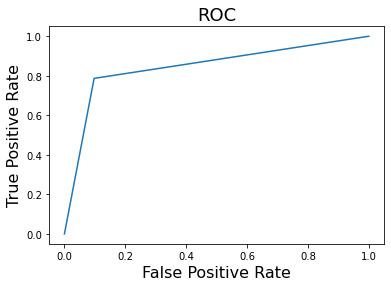

In [41]:
import libs.simpleplotter as plot

plot.simple_roc(y_valid, y_pred)

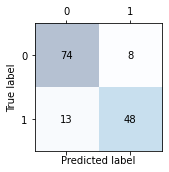

array([[74,  8],
       [13, 48]])

In [42]:
from libs.simpleplotter import simple_confusion_matrix

simple_confusion_matrix(y_valid, y_pred, winner.classes_)

In [43]:
y_test = winner.predict(X_test)
output = pd.DataFrame({'PassengerId': PassengerColumn, 'Survived': y_test})
output.to_csv('./submission.csv', index=False)
SUBMISSION = pd.read_csv("./submission.csv")
SUBMISSION

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
326,1301,1
327,1303,1
328,1304,0
329,1306,1


Let's see which features were the most important for the training

In [44]:
labels = X_train.keys()
labels_filtered = []
importance_filtered = []
importance_threshold = 0.005

for index in range(len(winner.feature_importances_)):
    if winner.feature_importances_[index] > importance_threshold:
        labels_filtered.append(labels[index])
        importance_filtered.append(winner.feature_importances_[index])


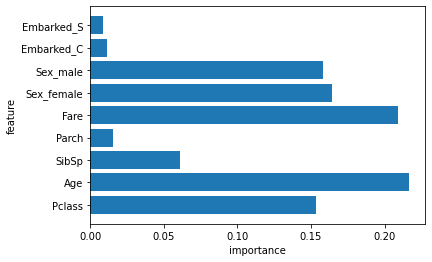

In [45]:
import matplotlib.pyplot as plt

plt.barh(y=range(len(labels_filtered)), width=importance_filtered, align='center')
plt.yticks(np.arange(len(labels_filtered)), labels_filtered)
plt.xlabel("importance")
plt.ylabel(ylabel="feature")
plt.show()